<a href="https://colab.research.google.com/github/gaponniah/MachineLearning/blob/main/Ployauto013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#===================== Install required libraries ======================


import pandas as pd

import numpy as np
!pip install dtreeviz 
!pip install scikit-learn

import matplotlib.pyplot as plt
%matplotlib inline

#===================== Import required libraries ======================

# importing required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#========================== Hyperparameters ===========================

# Set Hyperparameters
C = .01
degree = 3
kernel ='poly'
gamma = 'auto'

#============================== Data set ===============================

# Loading iris dataset
data_set = datasets.load_iris()
X = data_set.data
y = data_set.target
feature_names = data_set.feature_names
classes = data_set.target_names

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.2, 
                                    stratify=y, 
                                    random_state=42)


#============================== Training ===============================

# Train SVM Model
model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
model.fit(X_train, y_train)

#============================== Testing ===============================

# Testing model on train data

# get the prediction labels of the training data
cross_validation = cross_val_score(model, X_train, y_train, cv=5)

# evaluate and print the results
print("\nModel Performance on Training Data: {}".format(
    np.mean(cross_validation).round(2)))

# Testing model on test data

# get the prediction labels of the test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print("\nModel Performance on Test Data: {}".format(
    accuracy.round(2)))

# Generate text reprot showing the main classification metrics
report = classification_report(y_test, y_pred)
print(report)

     |████████████████████████████████| 61 kB 238 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=d4d36ae54beaf6e86535ca0e89701ed9981a583690ed612fa8b8f863e84504f2
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz

Model Performance on Training Data: 0.97

Model Performance on Test Data: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



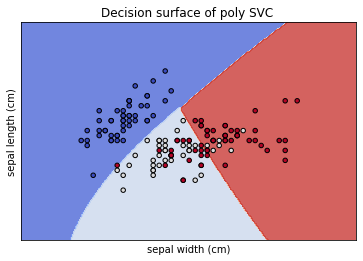

In [ ]:
#=========================== Visualization ============================

# Plotting using just 2-features - comment on "why?"
X = data_set.data[:, :2]
y = data_set.target
feature_names = data_set.feature_names[:2]
classes = data_set.target_names

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.2,
                                    stratify=y,
                                    random_state=42)

# Train SVM Model
model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
model.fit(X_train, y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of poly SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()